パフォーマンスモニターをcsv形式に変換する。

relog localhost_000001.blg -o localhost_000001.csv -f CSV

完成したcsvファイルは、下記の作業を前以って実施することで加工しやすくする。
[\\]、[' ']をなくす。

In [94]:
import matplotlib.pyplot as plt


import pandas as pd
perlogs = pd.read_csv("C:\TANIGUCHIJUN_20170217-000001\Performance_Counter.csv")

In [95]:
timestamps = []
jobs = []
#JOB起動時間
start_date_time = "2017-02-17 22:11:20.947"
#JOB終了時間
end_date_time   = "2017-02-17 22:14:00.949"

for timestamp in perlogs["(PDH-CSV4.0)("]:
    time = timestamp[-12:]
    date = timestamp[:10]
    timestamp = date + ' ' + time
    date_time = pd.to_datetime(timestamp)
    #実際に起動した時間のみ、JOB列にフラグ1を立てる
    if pd.to_datetime(start_date_time) < date_time and date_time < pd.to_datetime(end_date_time):
        job = 1
        timestamps.append(date_time) 
    else:
        job = 0
    jobs.append(job)

perlogs["TIMESTAMP"] = pd.Series(timestamps)
perlogs["JOB"] = pd.Series(jobs)
joblogs = perlogs[perlogs["JOB"] == 1]
joblogs.head(10)

,(PDH-CSV4.0)(,TANIGUCHIJUNIPv6DatagramsReceivedDelivered/sec,TANIGUCHIJUNIPv6DatagramsReceivedUnknownProtocol,TANIGUCHIJUNIPv6FragmentedDatagrams/sec,TANIGUCHIJUNIPv6Datagrams/sec,TANIGUCHIJUNIPv6FragmentationFailures,TANIGUCHIJUNIPv6FragmentsRe-assembled/sec,TANIGUCHIJUNIPv6FragmentsReceived/sec,TANIGUCHIJUNIPv6DatagramsForwarded/sec,TANIGUCHIJUNIPv6DatagramsOutboundNoRoute,...,TANIGUCHIJUNProcess(igfxtray)HandleCount,TANIGUCHIJUNProcess(brs)HandleCount,TANIGUCHIJUNProcess(dwm)HandleCount,TANIGUCHIJUNProcess(lsm)HandleCount,TANIGUCHIJUNProcess(mmc)HandleCount,TANIGUCHIJUNProcess(UNS)HandleCount,TANIGUCHIJUNProcess(LMS)HandleCount,TANIGUCHIJUNProcess(CMA)HandleCount,TIMESTAMP,JOB
3,02/17/201722:11:21.949,0.000000,0,0.0,6.985967,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:24.939,1
4,02/17/201722:11:22.942,0.000000,0,0.0,0.000000,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:25.944,1
5,02/17/201722:11:23.935,2.013869,0,0.0,3.020804,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:26.944,1
6,02/17/201722:11:24.939,0.000000,0,0.0,6.970841,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:27.945,1
7,02/17/201722:11:25.944,0.000000,0,0.0,0.000000,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:28.946,1
8,02/17/201722:11:26.944,8.007975,0,0.0,18.017943,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:29.936,1
9,02/17/201722:11:27.945,0.998776,0,0.0,7.990212,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:30.945,1
10,02/17/201722:11:28.946,0.000000,0,0.0,2.997062,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:31.938,1
11,02/17/201722:11:29.936,1.010142,0,0.0,17.172414,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:32.946,1
12,02/17/201722:11:30.945,0.990967,0,0.0,1.981934,0,0.0,0.0,0.0,137,...,116,75,174,261,647,179,126,237,2017-02-17 22:11:33.949,1


In [96]:
AvailableMBytes         = joblogs["TANIGUCHIJUNMemoryAvailableMBytes"]
DiskTime                = joblogs["TANIGUCHIJUNPhysicalDisk(0C:)%DiskTime"]
Pages_sec               = joblogs["TANIGUCHIJUNMemoryPages/sec"]
BytesTotal_sec          = joblogs["TANIGUCHIJUNNetworkInterface(TeredoTunnelingPseudo-Interface)BytesTotal/sec"]
Avg_DiskQueueLength     = joblogs["TANIGUCHIJUNPhysicalDisk(_Total)Avg.DiskQueueLength"]
CurrentDiskQueueLength  = joblogs["TANIGUCHIJUNPhysicalDisk(_Total)CurrentDiskQueueLength"]
DiskWrites_sec          = joblogs["TANIGUCHIJUNPhysicalDisk(_Total)DiskWrites/sec"]
Processor_ProcessorTime = joblogs["TANIGUCHIJUNProcessor(_Total)%ProcessorTime"]
Process_ProcessorTime   = joblogs["TANIGUCHIJUNProcess(McTkSchedulerService)%ProcessorTime"]
UserTime                = joblogs["TANIGUCHIJUNProcessor(_Total)%UserTime"]
InterruptTime           = joblogs["TANIGUCHIJUNProcessor(_Total)%InterruptTime"]

In [97]:
plt.figure();
plt.figure(figsize=(20, 20), dpi=80)

primelogs = pd.DataFrame()
primelogs["TimeStamp"] = timestamps
primelogs["AvailableMBytes"] = AvailableMBytes
primelogs["DiskTime"] = DiskTime
primelogs["Pages_sec"] = Pages_sec
primelogs["BytesTotal_sec"] = BytesTotal_sec
primelogs["Avg_DiskQueueLength"] = Avg_DiskQueueLength
primelogs["CurrentDiskQueueLength"] = CurrentDiskQueueLength
primelogs["DiskWrites_sec"] = DiskWrites_sec
primelogs["Processor_ProcessorTime"] = Processor_ProcessorTime
primelogs["Process_ProcessorTime"] = Process_ProcessorTime
primelogs["UserTime"] = UserTime
primelogs["InterruptTime"] = InterruptTime
primelogs.to_csv("C:\TANIGUCHIJUN_20170217-000001\prime_counter.csv", sep=",")
primelogs.head(10)

,TimeStamp,AvailableMBytes,DiskTime,Pages_sec,BytesTotal_sec,Avg_DiskQueueLength,CurrentDiskQueueLength,DiskWrites_sec,Processor_ProcessorTime,Process_ProcessorTime,UserTime,InterruptTime
0,2017-02-17 22:11:21.949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-02-17 22:11:22.942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-02-17 22:11:23.935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-02-17 22:11:24.939,1974.0,378.880491,596.801156,0.0,3.911652,6.0,234.528882,16.710829,0.0,4.281222,0.000000
4,2017-02-17 22:11:25.944,1974.0,479.408630,508.568734,0.0,4.858232,4.0,215.512295,22.632321,0.0,6.283669,0.000000
5,2017-02-17 22:11:26.944,1983.0,328.087980,563.883409,0.0,3.396986,4.0,239.650449,19.490496,0.0,7.069122,0.000000
6,2017-02-17 22:11:27.945,1982.0,375.536299,809.613371,0.0,3.895594,3.0,188.212702,23.091558,0.0,6.603248,0.000000
7,2017-02-17 22:11:28.946,1971.0,296.361153,613.993221,0.0,3.078530,4.0,182.108200,24.720237,0.0,10.865120,0.000000
8,2017-02-17 22:11:29.936,1982.0,338.369048,680.677845,0.0,3.495696,2.0,220.219303,16.460701,0.0,2.732597,0.000000
9,2017-02-17 22:11:30.945,1979.0,318.553194,474.418813,0.0,3.239974,3.0,244.700230,14.679659,0.0,6.233449,0.000000


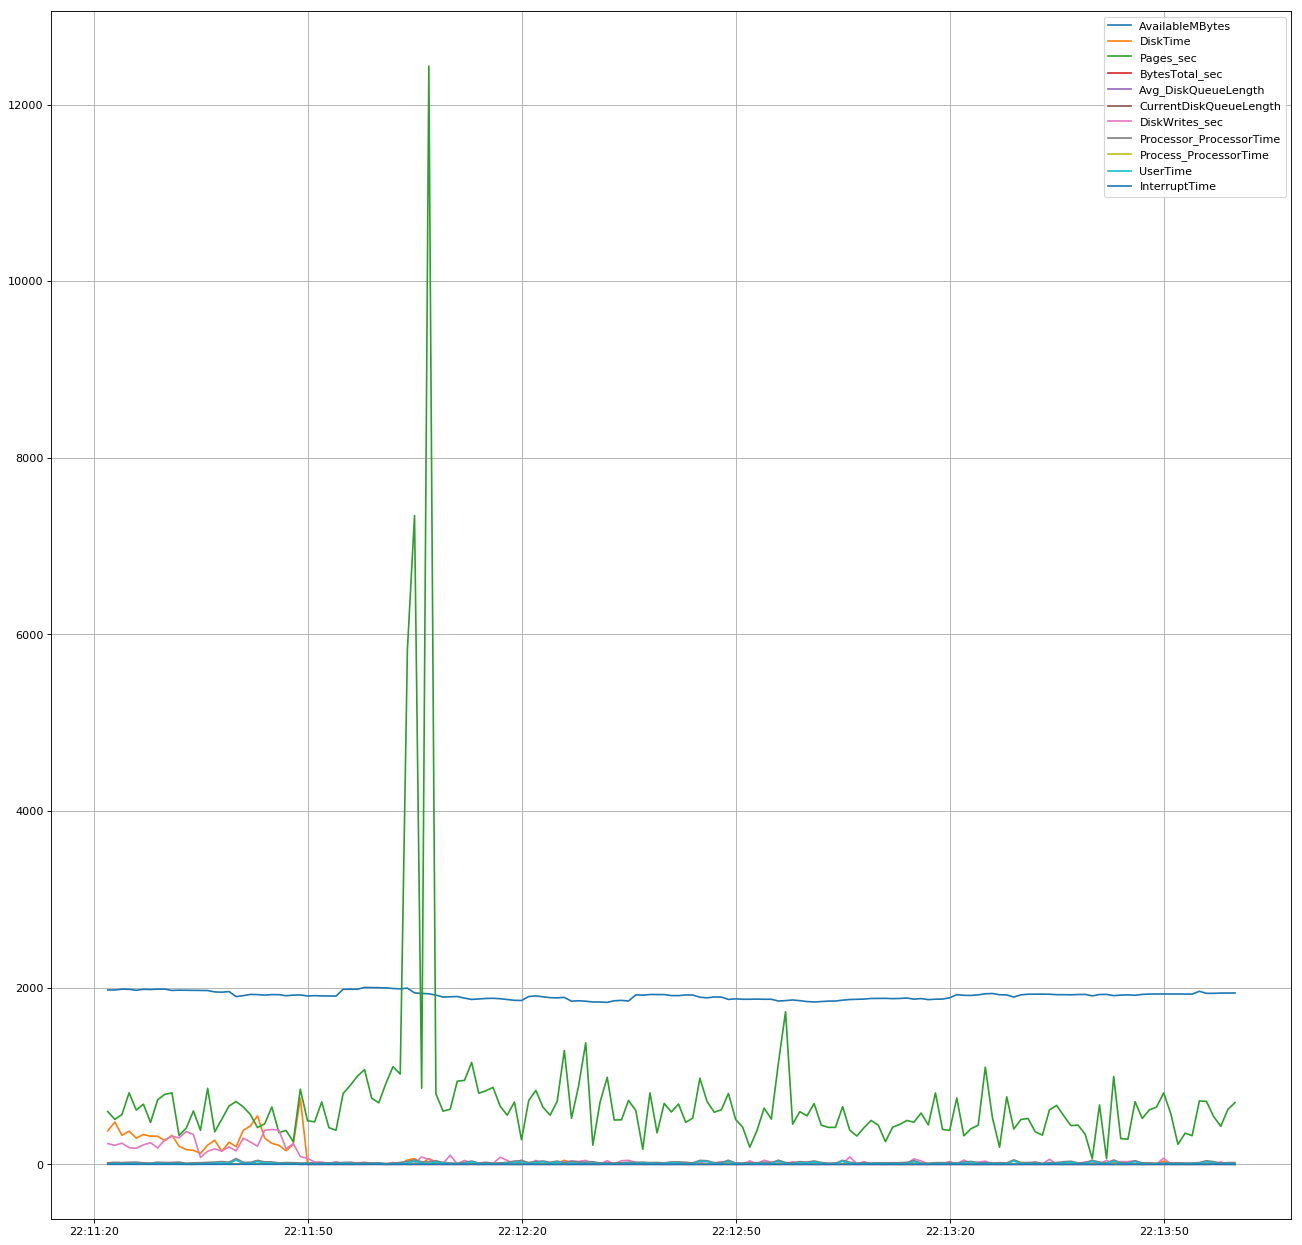

In [98]:
plt.figure()
plt.figure(figsize=(20, 20), dpi=80)

plt.plot(timestamps, AvailableMBytes, label='AvailableMBytes')
plt.plot(timestamps, DiskTime, label='DiskTime')
plt.plot(timestamps, Pages_sec, label='Pages_sec')
plt.plot(timestamps, BytesTotal_sec, label='BytesTotal_sec')
plt.plot(timestamps, Avg_DiskQueueLength, label='Avg_DiskQueueLength')
plt.plot(timestamps, CurrentDiskQueueLength, label='CurrentDiskQueueLength')
plt.plot(timestamps, DiskWrites_sec, label='DiskWrites_sec')
plt.plot(timestamps, Processor_ProcessorTime, label='Processor_ProcessorTime')
plt.plot(timestamps, Process_ProcessorTime, label='Process_ProcessorTime')
plt.plot(timestamps, UserTime, label='UserTime')
plt.plot(timestamps, InterruptTime, label='InterruptTime')

plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [72]:
import numpy as np
#perlogs.interpolate()
plt.figure()
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11) = plt.subplots(11,figsize=(20,20), dpi=100)

ax1.plot(timestamps, AvailableMBytes, linewidth=2)
ax1.set_ylabel('AvailableMBytes')
ax1.grid(True)

ax2.plot(timestamps, DiskTime, linewidth=2)
ax2.set_ylabel('DiskTime')
ax2.grid(True)

ax3.plot(timestamps, Pages_sec, linewidth=2)
ax3.set_ylabel('Pages_sec')
ax3.grid(True)

ax4.plot(timestamps, BytesTotal_sec, linewidth=2)
ax4.set_ylabel('BytesTotal_sec')
ax4.grid(True)

ax5.plot(timestamps, Avg_DiskQueueLength, linewidth=2)
ax5.set_ylabel('Avg_DiskQueueLength')
ax5.grid(True)

ax6.plot(timestamps, CurrentDiskQueueLength, linewidth=2)
ax6.set_ylabel('CurrentDiskQueueLength')
ax6.grid(True)

ax7.plot(timestamps, DiskWrites_sec, linewidth=2)
ax7.set_ylabel('DiskWrites_sec')
ax7.grid(True)

ax8.plot(timestamps, Processor_ProcessorTime, linewidth=2)
ax8.set_ylabel('Processor_ProcessorTime')
ax8.grid(True)

ax9.plot(timestamps, Process_ProcessorTime, linewidth=2)
ax9.set_ylabel('Process_ProcessorTime')
ax9.grid(True)

ax10.plot(timestamps, UserTime, linewidth=2)
ax10.set_ylabel('UserTime')
ax10.grid(True)

ax11.plot(timestamps, InterruptTime, linewidth=2)
ax11.set_ylabel('InterruptTime')
ax11.grid(True)

filename = "C:\TANIGUCHIJUN_20170217-000001\output.png"
plt.savefig(filename)

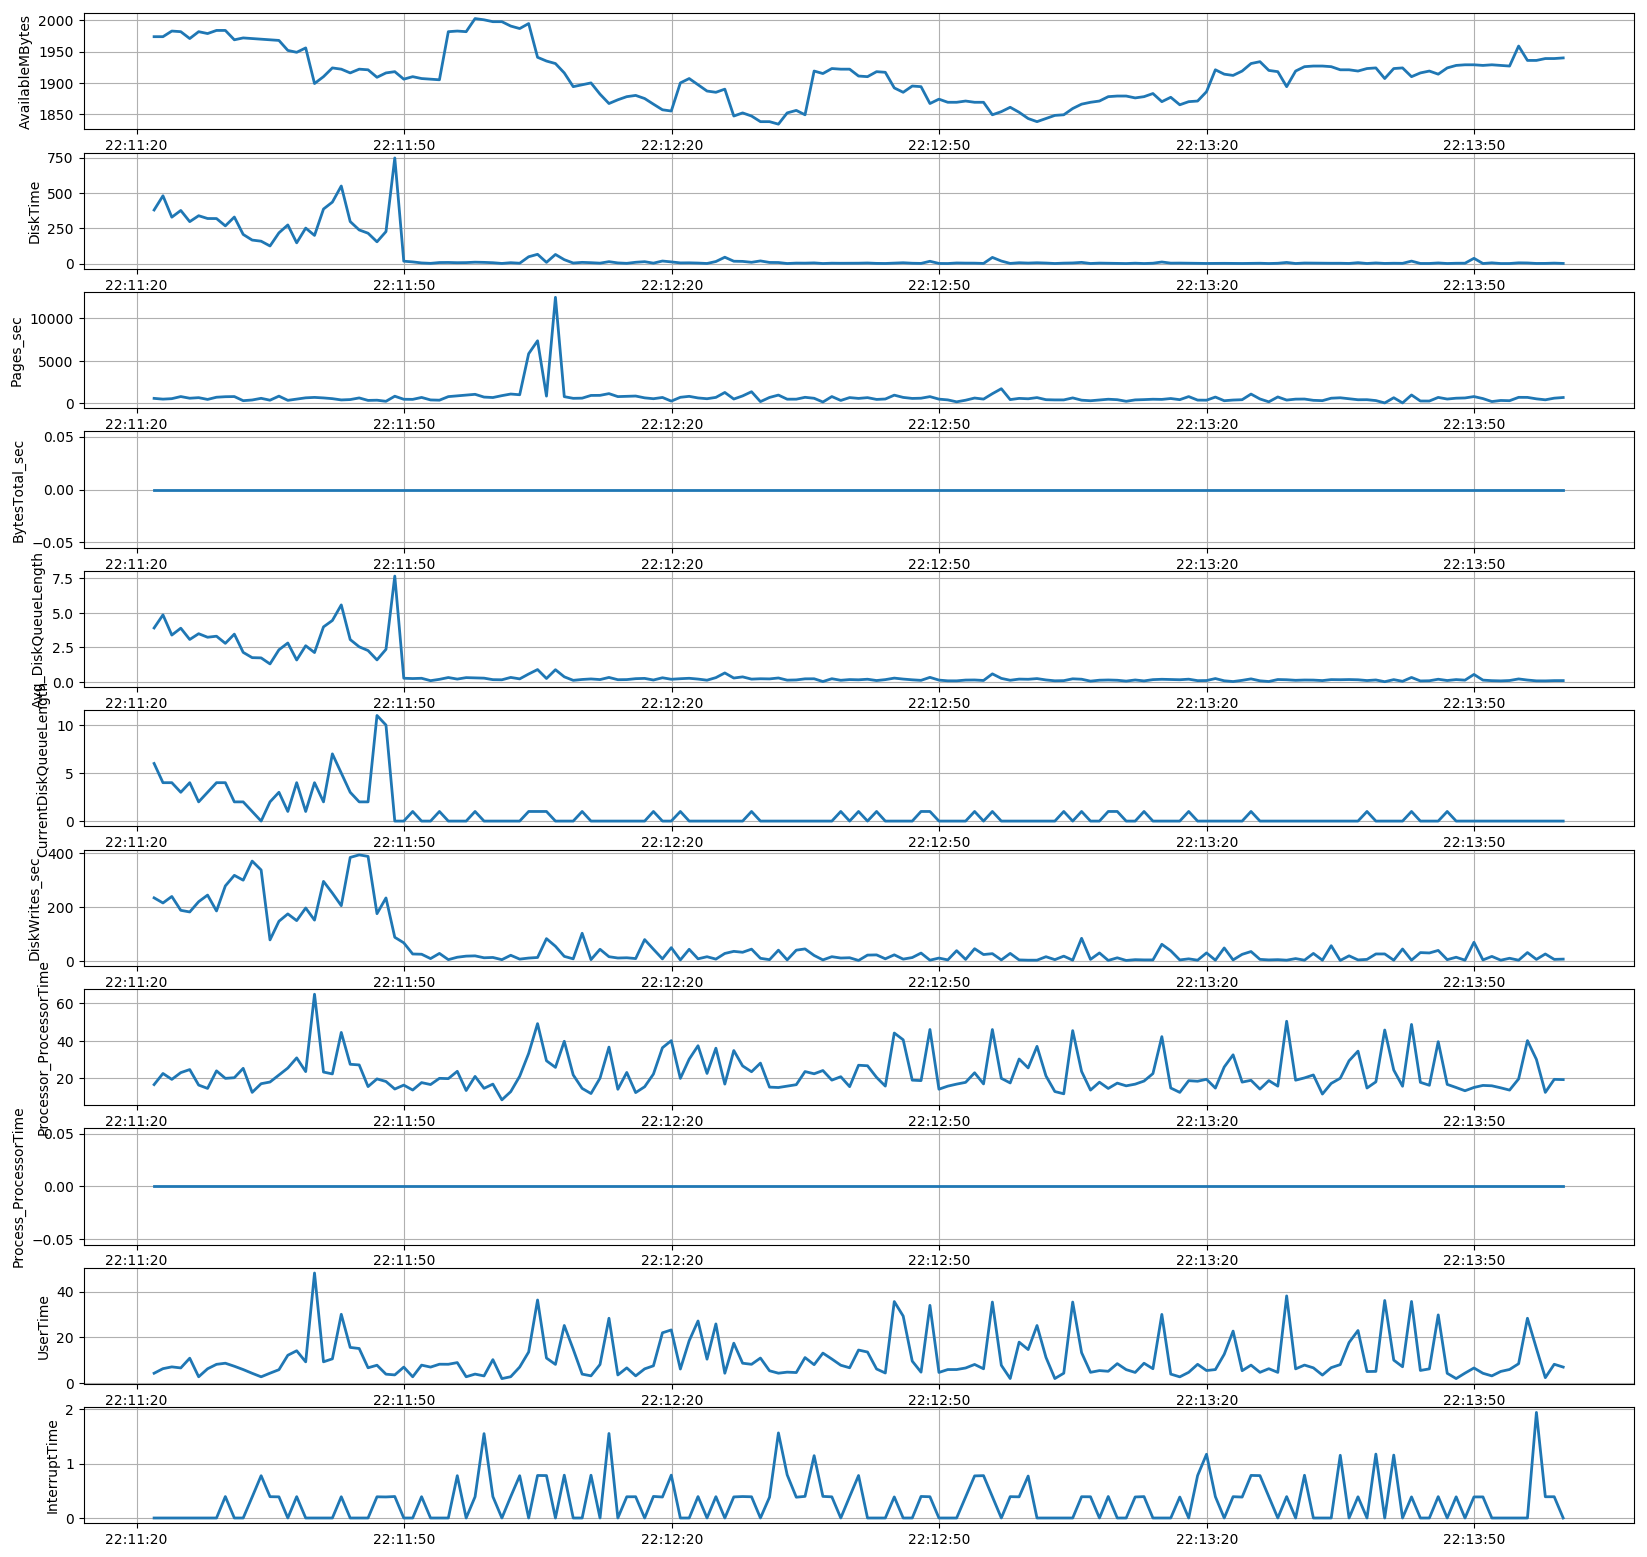

In [73]:
plt.show()